# 模型对比

In [23]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from utils import *

## 加载预测结果与真实值

In [24]:
test_labels_true, test_labels_pred = load_pred_data()


===== 预测结果加载完成 =====

共加载 6 个模型的预测结果
模型列表: ['CNN', 'DNN', 'XGBoost', 'MLP', 'Random-Forest', 'SVM']


In [25]:
test_labels_true

array([0, 1, 2, ..., 8, 8, 1])

In [26]:
metrics_dict = {}
for model_name, pred_labels in test_labels_pred.items():
    acc = accuracy_score(test_labels_true, pred_labels)
    prec = precision_score(test_labels_true, pred_labels, average='weighted')
    rec = recall_score(test_labels_true, pred_labels, average='weighted')
    f1 = f1_score(test_labels_true, pred_labels, average='weighted')
    metrics_dict[model_name] = {
        '准确率': acc,
        '精确率': prec,
        '召回率': rec,
        'F1分数': f1
    }

In [27]:
df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index')
df_metrics.reset_index(inplace=True)
df_metrics.rename(columns={'index': '模型'}, inplace=True)
sns.set(style="whitegrid")

## 准确率

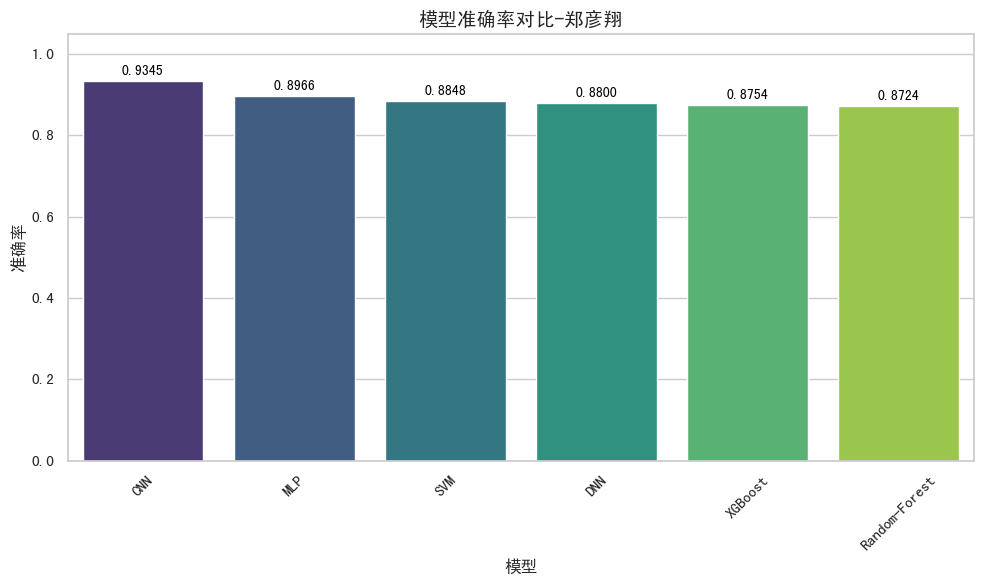

In [28]:
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False    
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='模型', 
    y='准确率', 
    data=df_metrics.sort_values(by='准确率', ascending=False),
    hue='模型',
    palette='viridis',
    legend=False 
)
plt.title('模型准确率对比-郑彦翔', fontsize=14)
plt.xlabel('模型')
plt.ylabel('准确率')
plt.xticks(rotation=45)
plt.ylim(0, 1.05)

for p in ax.patches:
    ax.annotate(
        text=f'{p.get_height():.4f}',  
        xy=(p.get_x() + p.get_width() / 2, p.get_height()),
        xytext=(0, 3),  
        textcoords='offset points',
        ha='center',    
        va='bottom',   
        fontsize=10,
        color='black'
    )
plt.tight_layout()
plt.show()

## 精确率

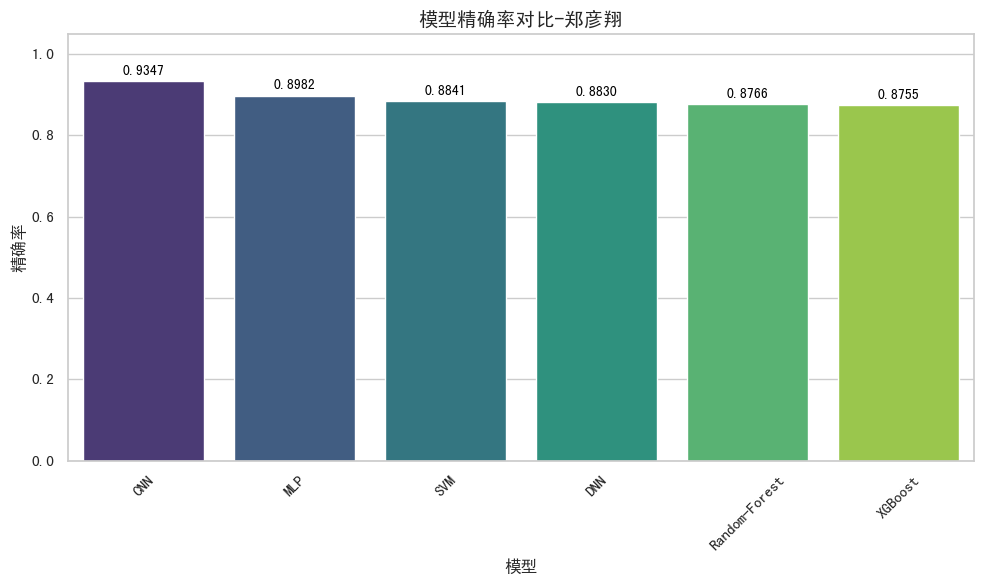

In [29]:
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False   
plt.figure(figsize=(10, 6))
ax_prec = sns.barplot(
    x='模型', 
    y='精确率', 
    data=df_metrics.sort_values(by='精确率', ascending=False),
    hue='模型',
    palette='viridis',
    legend=False
)
plt.title('模型精确率对比-郑彦翔', fontsize=14)
plt.xlabel('模型')
plt.ylabel('精确率')
plt.xticks(rotation=45)
plt.ylim(0, 1.05)

for p in ax_prec.patches:
    ax_prec.annotate(
        text=f'{p.get_height():.4f}',
        xy=(p.get_x() + p.get_width() / 2, p.get_height()),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

## 召回率

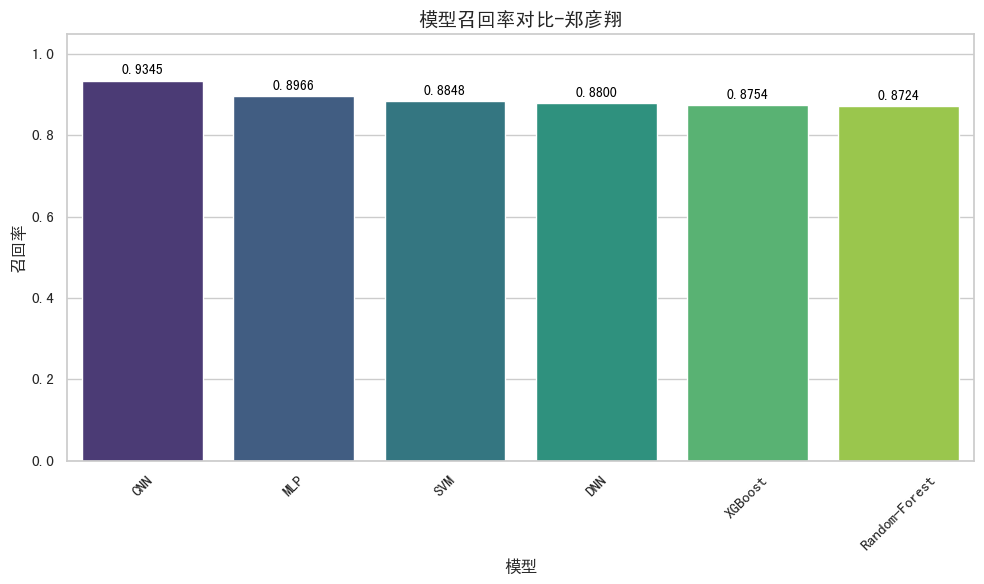

In [30]:
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
plt.figure(figsize=(10, 6))
ax_rec = sns.barplot(
    x='模型', 
    y='召回率', 
    data=df_metrics.sort_values(by='召回率', ascending=False),
    hue='模型',
    palette='viridis',
    legend=False
)
plt.title('模型召回率对比-郑彦翔', fontsize=14)
plt.xlabel('模型')
plt.ylabel('召回率')
plt.xticks(rotation=45)
plt.ylim(0, 1.05)

for p in ax_rec.patches:
    ax_rec.annotate(
        text=f'{p.get_height():.4f}',
        xy=(p.get_x() + p.get_width() / 2, p.get_height()),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

## F1分数

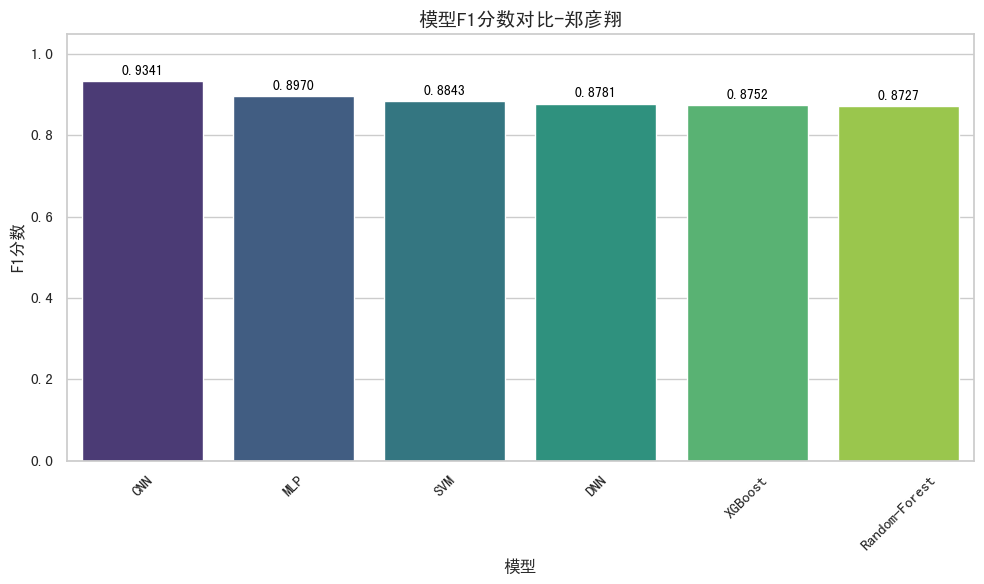

In [31]:
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
plt.figure(figsize=(10, 6))
ax_f1 = sns.barplot(
    x='模型', 
    y='F1分数', 
    data=df_metrics.sort_values(by='F1分数', ascending=False),
    hue='模型',
    palette='viridis',
    legend=False
)
plt.title('模型F1分数对比-郑彦翔', fontsize=14)
plt.xlabel('模型')
plt.ylabel('F1分数')
plt.xticks(rotation=45)
plt.ylim(0, 1.05)

for p in ax_f1.patches:
    ax_f1.annotate(
        text=f'{p.get_height():.4f}',
        xy=(p.get_x() + p.get_width() / 2, p.get_height()),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

## 各模型评估指标比较

<Figure size 1200x600 with 0 Axes>

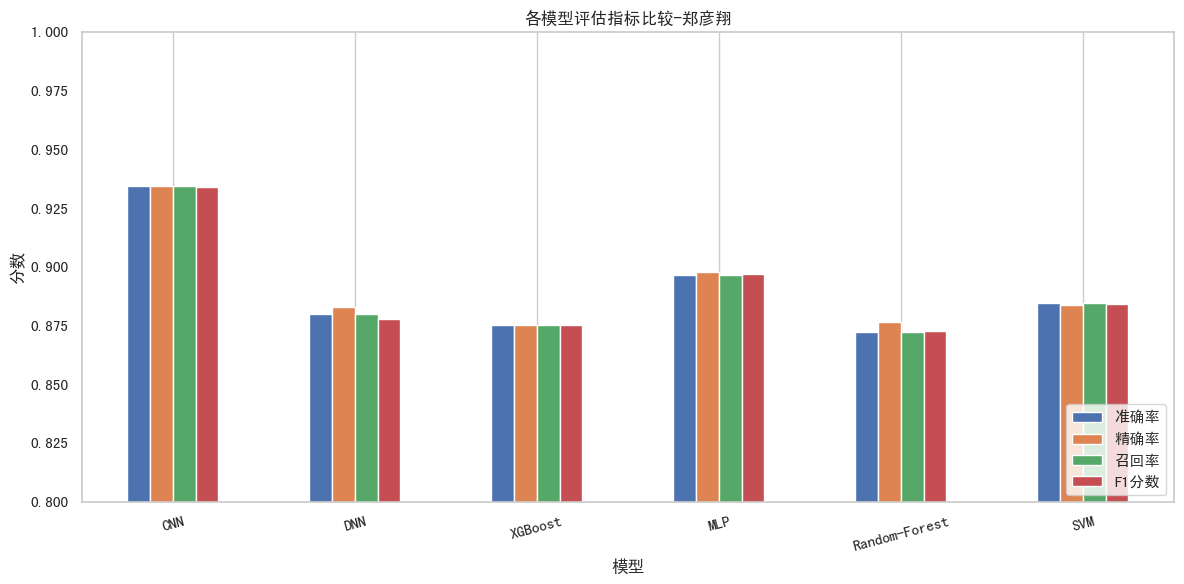

In [32]:
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False   
plt.figure(figsize=(12,6))
metrics = ['准确率', '精确率', '召回率', 'F1分数']
df_plot = df_metrics.set_index('模型')[metrics]
df_plot.plot(kind='bar', figsize=(12,6))
plt.title("各模型评估指标比较-郑彦翔")
plt.ylabel("分数")
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

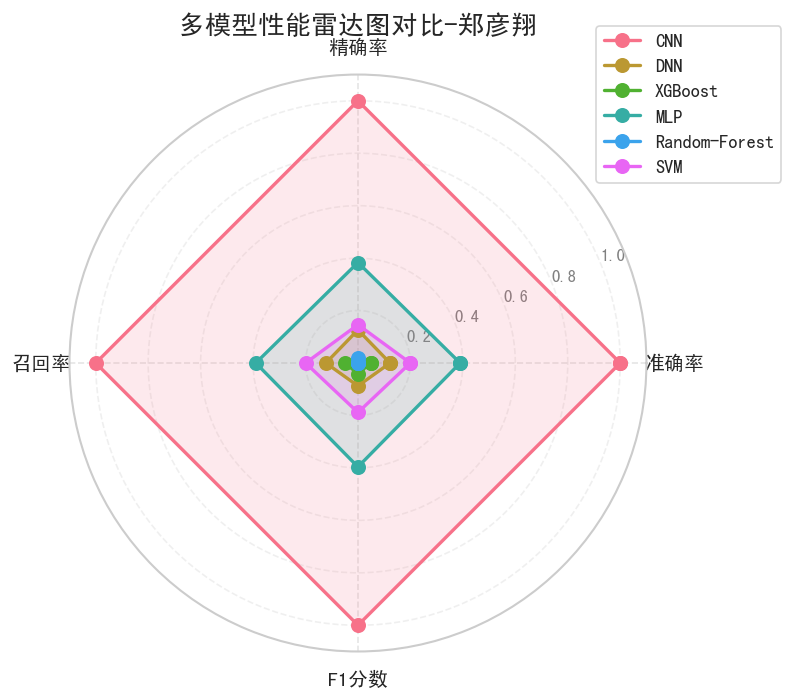

In [33]:
from math import pi
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
categories = ['准确率', '精确率', '召回率', 'F1分数']
num_vars = len(categories)

df_norm = df_metrics.copy()
for col in categories:
    min_val = df_norm[col].min()
    max_val = df_norm[col].max()
    if max_val - min_val > 0:
        df_norm[col] = (df_norm[col] - min_val) / (max_val - min_val)
    else:
        df_norm[col] = 0.5  

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# 创建雷达图
plt.figure(figsize=(8, 6), dpi=120)
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categories, fontsize=12, weight='bold')
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], 
           color="grey", size=10)
plt.ylim(0, 1.1)

# 为每个模型绘制雷达图
colors = sns.color_palette("husl", len(df_norm))
for i, row in df_norm.iterrows():
    values = row[categories].tolist()
    values += values[:1]  
    
    # 绘制填充区域和边界线
    ax.plot(angles, values, color=colors[i], linewidth=2, 
            label=row['模型'], marker='o', markersize=8)
    ax.fill(angles, values, color=colors[i], alpha=0.15)

plt.title("多模型性能雷达图对比-郑彦翔", size=16, pad=25, weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1), frameon=True)

ax.xaxis.grid(True, linestyle='--', alpha=0.5)
ax.yaxis.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()